<a href="https://colab.research.google.com/github/shashanksrajak/neural-networks-from-zero/blob/main/hands-on/ch10_starting_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch10 : Introduction to ANN with Keras & Tensorflow

## Building an Image Classifier using Sequential API
We use fashion MNIST dataset to learn the sequential API and building an ANN for classification

We use `tensorflow` library and `keras` comes pre-installed with it.

In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(55000, 28, 28)

We have 55000 training samples, each 28x28 size i.e. 28x28 pixels

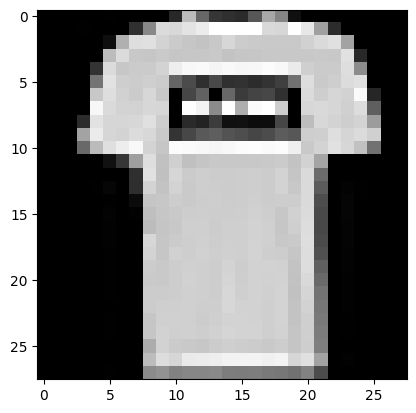

In [11]:
plt.imshow(X_train[1], cmap="grey")

Although as a human I am not able to clearly tell what each image represents but I am ready to train the computer to identify the images. Lets start!!!

In [13]:
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0

## Create the Model

In [14]:
tf.random.set_seed(42) # to keep results reproducible

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[28, 28]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax") # this is the output layer of multiclass = 10
    ]
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

Now we will train the model, and it takes significant amount of time. We have ~60000 images, and a batch size of 32 (default) i.e. in one go 32 images are passed to the model. ~60000/32 = ~2000 batches each of 32 and last one being <32

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6922 - loss: 0.9717 - val_accuracy: 0.8302 - val_loss: 0.5011
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8261 - loss: 0.5062 - val_accuracy: 0.8378 - val_loss: 0.4486
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8420 - loss: 0.4516 - val_accuracy: 0.8506 - val_loss: 0.4229
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8520 - loss: 0.4206 - val_accuracy: 0.8566 - val_loss: 0.4073
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8601 - loss: 0.3985 - val_accuracy: 0.8574 - val_loss: 0.3972
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8663 - loss: 0.3810 - val_accuracy: 0.8584 - val_loss: 0.3894
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8701 - loss: 0.3663 - val_accuracy: 0.8626 - val_loss: 0.3816
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8740 - loss: 0.353

This `history` contains lot of useful information

In [18]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

<Axes: >

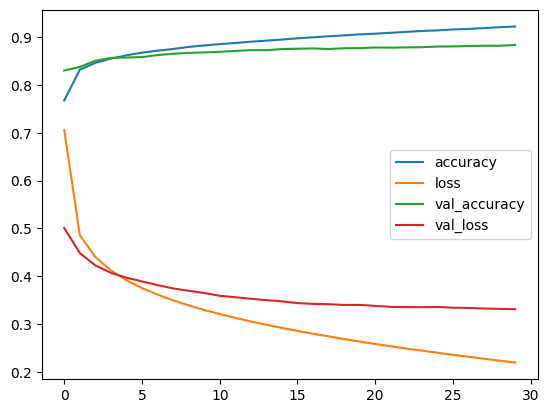

In [23]:
pd.DataFrame(history.history).plot()

In [24]:
y_prob = model.predict(X_test[:3])
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.01, 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_prob.argmax(axis=-1)

array([9, 2, 1])

In [28]:
y_test[0]

np.uint8(9)

In [29]:
y_test[2]

np.uint8(1)

## Saving the model
`.keras` is the latest format recommended by tensorflow docs. Earlier formats are now leagcy.

https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model

In [33]:
model.save("mnist_model.keras")

We can also save just the weights. What is its utility?
1. transfer learning
2. sharing the model's learning with others who can use it to evaluate the model
3. resource constraint
4. saving the progress of model using callbacks if the training is intensive and long running

In [34]:
new_model = tf.keras.models.load_model("mnist_model.keras")

In [37]:
y_prob = new_model.predict(X_test[:3])
y_prob.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.01, 0.  , 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)